In [1]:
# Data Handling
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import os
from numpy.random import seed

# Visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

#PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA


# Load specific forecasting tools 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, Callback, History, EarlyStopping

from keras.models import Sequential, Model , load_model
from keras.layers import Dense, LSTM, GRU, Flatten, BatchNormalization, Activation, Dropout, TimeDistributed
from keras.layers.convolutional import Conv1D, MaxPooling1D,Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, Callback, History, EarlyStopping
from keras import optimizers, regularizers

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

Using TensorFlow backend.


In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
seed(42)

In [4]:
!ls ../App/Data

Cleaned_data_lloyds.csv FTSE_HistoricalData.csv LLOY_HistoricPrices.csv
Data_Corrections.xlsx   GBP_USD.csv             Oil_HistoricPrices.csv


In [51]:
# Read data into Dataframe
data=pd.read_csv('../App/Data/Cleaned_data_lloyds.csv')

In [6]:
data.head(2)

,Date,Lloyds_Open,Lloyds_High,Lloyds_Low,Lloyds_Close,Volume,SMA_10,WMA_10,rsi,stoc_k,stoc_d,mom,macd,adosc,cci,willr,GBP/USD Price,GBP/USD_Open_Price,GBP/USD_High_Price,GBP/USD_Low_Price,Oil_Price,Oil_Open,Oil_High,Oil_Low,Oil_Volume,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,Weekday,Month,Year
0,2009-03-03,50.8,53.9,44.1,45.5,104107533.0,55.83,55.680000,37.073918,14.764681,12.192351,-45.4,-13.657867,-4.699649e+07,-145.438898,-95.965418,1.4059,1.4054,1.4159,1.3985,41.65,40.10,42.07,39.44,241540.0,3512.1,3625.8,3676.9,3497.3,1,3,2009
1,2009-03-04,45.3,49.4,45.3,47.7,60277100.0,54.96,54.201818,38.680117,14.718483,13.015858,-8.7,-13.881083,-5.072661e+07,-116.507236,-89.625360,1.4164,1.4049,1.4195,1.3985,45.38,41.38,45.76,41.04,319760.0,3645.9,3512.1,3649.5,3512.1,2,3,2009


In [7]:
data.tail(2)

,Date,Lloyds_Open,Lloyds_High,Lloyds_Low,Lloyds_Close,Volume,SMA_10,WMA_10,rsi,stoc_k,stoc_d,mom,macd,adosc,cci,willr,GBP/USD Price,GBP/USD_Open_Price,GBP/USD_High_Price,GBP/USD_Low_Price,Oil_Price,Oil_Open,Oil_High,Oil_Low,Oil_Volume,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,Weekday,Month,Year
2874,2020-08-26,28.18,28.560,28.03,28.475,91481211.0,28.511,28.397364,48.050768,2.230276,15.223998,-1.215,-0.343022,4.499803e+07,-41.831496,-97.656735,1.3208,1.3153,1.3220,1.3117,45.64,45.97,46.10,45.54,132510.0,6045.60,6037.01,6050.81,5992.22,2,8,2020
2875,2020-08-27,28.32,28.595,28.08,28.200,94257788.0,28.413,28.340818,44.811213,1.872695,8.448560,-0.980,-0.339979,2.593362e+07,-40.100473,-98.510242,1.3198,1.3207,1.3285,1.3162,45.09,45.70,45.87,44.56,102260.0,5999.99,6045.60,6062.52,5999.99,3,8,2020


In [8]:
print(data.shape)
print('\n ---- Null Values ---- ')
print(data.isnull().sum(axis=0).sort_values(ascending=False))

(2876, 32)

 ---- Null Values ---- 
Year                  0
Month                 0
Lloyds_Open           0
Lloyds_High           0
Lloyds_Low            0
Lloyds_Close          0
Volume                0
SMA_10                0
WMA_10                0
rsi                   0
stoc_k                0
stoc_d                0
mom                   0
macd                  0
adosc                 0
cci                   0
willr                 0
GBP/USD Price         0
GBP/USD_Open_Price    0
GBP/USD_High_Price    0
GBP/USD_Low_Price     0
Oil_Price             0
Oil_Open              0
Oil_High              0
Oil_Low               0
Oil_Volume            0
FTSE_Price            0
FTSE_Open             0
FTSE_High             0
FTSE_Low              0
Weekday               0
Date                  0
dtype: int64


In [9]:
data[data.duplicated(['Lloyds_Open','Lloyds_High','Lloyds_Low','Lloyds_Close','Volume'])]

,Date,Lloyds_Open,Lloyds_High,Lloyds_Low,Lloyds_Close,Volume,SMA_10,WMA_10,rsi,stoc_k,stoc_d,mom,macd,adosc,cci,willr,GBP/USD Price,GBP/USD_Open_Price,GBP/USD_High_Price,GBP/USD_Low_Price,Oil_Price,Oil_Open,Oil_High,Oil_Low,Oil_Volume,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,Weekday,Month,Year


### TEST/TRAIN SPLIT

In [10]:
data.drop(columns=['Year','Date','Month','Volume','Weekday',
                   'GBP/USD_High_Price','GBP/USD_Low_Price','GBP/USD Price',
                   'Oil_Price','Oil_High','Oil_Low','Oil_Volume',
                   'FTSE_Price','FTSE_High','FTSE_Low'
                  ],inplace=True)
#data=data[[
#           'Lloyds_Open','Lloyds_High','Lloyds_Low',
#           'Lloyds_Close',
#           'Volume',
#           'momentum_rsi','momentum_stoch','momentum_stoch_signal',
#           'GBP/USD','Oil_Price',
#           'Weekday_0','Weekday_1','Weekday_2','Weekday_3','Weekday_4',
#           'rbs_Close_Price','Barc_Close_Price'
#          ]]

In [11]:
#data=data[['Lloyds_Open','Lloyds_High','Lloyds_Low','Lloyds_Close','Volume',
#          'momentum_rsi','momentum_stoch','momentum_stoch_signal','GBP/USD','Oil_Price',
#           'Weekday_0','Weekday_1','Weekday_2','Weekday_3','Weekday_4','rbs_Close_Price','Barc_Close_Price']]

In [12]:
data_train, data_val = train_test_split(data, train_size=0.90, test_size=0.10, shuffle=False)
val_count=int(data_val.shape[0]*0.8)
test_count=data_val.shape[0]-val_count
print(val_count)
print(test_count)

data_test=data_val[val_count:][:]
data_val=data_val[:val_count][:]

print('Shape of deep learning data : ', data.shape)
print('Shape of Training data: ',data_train.shape)
print('Shape of Validation data: ',data_val.shape)
print('Shape of Test data: ',data_test.shape)

230
58
Shape of deep learning data :  (2876, 17)
Shape of Training data:  (2588, 17)
Shape of Validation data:  (230, 17)
Shape of Test data:  (58, 17)


In [13]:
print('Training Data Sample :  '+'\n'+ '='*30 + '\n', data_train.head())

Training Data Sample :  
    Lloyds_Open  Lloyds_High  Lloyds_Low  Lloyds_Close  SMA_10     WMA_10  \
0        50.80         53.9       44.10         45.50  55.830  55.680000   
1        45.30         49.4       45.30         47.70  54.960  54.201818   
2        45.17         48.1       38.54         39.32  53.812  51.358182   
3        42.00         43.8       40.50         42.00  52.332  49.210545   
4        38.00         44.3       36.00         43.70  51.072  47.641091   

         rsi     stoc_k     stoc_d    mom       macd         adosc  \
0  37.073918  14.764681  12.192351 -45.40 -13.657867 -4.699649e+07   
1  38.680117  14.718483  13.015858  -8.70 -13.881083 -5.072661e+07   
2  34.908884  14.034495  14.232971 -11.48 -14.566269 -7.446972e+07   
3  37.088470  13.217930  14.996839 -14.80 -14.723309 -7.921871e+07   
4  38.538990   7.155237  13.270983 -12.60 -14.542946 -3.829150e+07   

          cci      willr  GBP/USD_Open_Price  Oil_Open  FTSE_Open  
0 -145.438898 -95.965418    

In [37]:
data_test.head(2)

,Lloyds_Open,Lloyds_High,Lloyds_Low,Lloyds_Close,SMA_10,WMA_10,rsi,stoc_k,stoc_d,mom,macd,adosc,cci,willr,GBP/USD_Open_Price,Oil_Open,FTSE_Open
2818,36.950,37.302,34.774,35.225,33.1150,34.101091,63.944214,87.076474,79.739407,5.150,1.028370,2.529940e+08,95.958559,-35.090909,1.2723,41.10,6472.59
2819,35.935,36.970,34.665,35.020,33.4355,34.447455,62.682598,83.682027,81.467958,3.205,1.099827,1.217673e+08,73.061972,-37.575758,1.2731,40.72,6335.72


In [38]:
data_test.tail(2)

,Lloyds_Open,Lloyds_High,Lloyds_Low,Lloyds_Close,SMA_10,WMA_10,rsi,stoc_k,stoc_d,mom,macd,adosc,cci,willr,GBP/USD_Open_Price,Oil_Open,FTSE_Open
2874,28.18,28.560,28.03,28.475,28.511,28.397364,48.050768,2.230276,15.223998,-1.215,-0.343022,4.499803e+07,-41.831496,-97.656735,1.3153,45.97,6037.01
2875,28.32,28.595,28.08,28.200,28.413,28.340818,44.811213,1.872695,8.448560,-0.980,-0.339979,2.593362e+07,-40.100473,-98.510242,1.3207,45.70,6045.60


## Normalisation - Using MinMax Scaler

In [14]:
scaler = MinMaxScaler()
train_scaled=scaler.fit_transform(data_train)
test_scaled=scaler.transform(data_test)
val_scaled=scaler.transform(data_val)

In [15]:
print('Scaled Data Sample :  '+'\n'+ '='*30 + '\n', train_scaled)
print('Scaled Data Shape :  ', train_scaled.shape)

Scaled Data Sample :  
 [[0.29328258 0.28874148 0.23552852 ... 0.39234823 0.14887183 0.02604602]
 [0.23670404 0.24728211 0.24811242 ... 0.39137224 0.16375901 0.        ]
 [0.23536673 0.23530496 0.17722315 ... 0.41987117 0.21074669 0.03065046]
 ...
 [0.36199979 0.32522572 0.37195889 ... 0.11672848 0.37031868 0.91296231]
 [0.36621747 0.33020085 0.37741191 ... 0.10696857 0.33949756 0.92709405]
 [0.36940644 0.33268841 0.38045302 ... 0.1036502  0.35019772 0.93857766]]
Scaled Data Shape :   (2588, 17)


In [39]:
test_scaled

array([[ 1.50807530e-01,  1.35820896e-01,  1.37730705e-01,
         1.34847874e-01,  1.15249364e-01,  1.27200283e-01,
         6.78411795e-01,  9.02205559e-01,  8.35202056e-01,
         6.76706827e-01,  6.19623079e-01,  8.82549593e-01,
         6.56132957e-01,  6.49090909e-01,  1.32539528e-01,
         1.60502442e-01,  6.78179298e-01],
       [ 1.40366217e-01,  1.32762115e-01,  1.36587668e-01,
         1.32782591e-01,  1.19056953e-01,  1.31254975e-01,
         6.61794109e-01,  8.66018781e-01,  8.54819484e-01,
         6.50669344e-01,  6.22433976e-01,  7.24981370e-01,
         6.21137641e-01,  6.24242424e-01,  1.34101113e-01,
         1.56082810e-01,  6.46825570e-01],
       [ 1.15317354e-01,  1.01206928e-01,  1.08640940e-01,
         1.02810800e-01,  1.19846984e-01,  1.28295369e-01,
         4.62522324e-01,  7.41176814e-01,  8.47487279e-01,
         6.16666667e-01,  6.14807688e-01,  5.33695635e-01,
         4.52031506e-01,  2.63636364e-01,  1.36833886e-01,
         1.58757851e-01,  6.4

In [16]:
scaled_frame=pd.DataFrame(train_scaled,columns=data_train.columns)

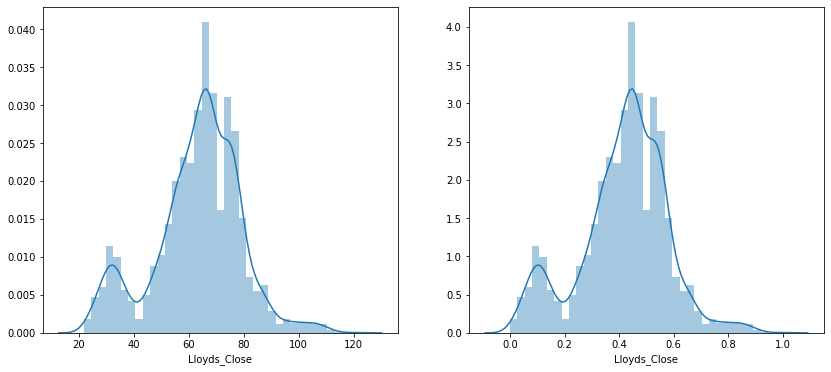

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(data_train['Lloyds_Close'])
plt.subplot(122)
sns.distplot(scaled_frame['Lloyds_Close'])
plt.show()

## Set up Tensor 

In [18]:
time_steps=10
batch_size=10
num_of_epochs=500

In [19]:
def data_tensor(batch_size,time_steps,array,close_price_loc):
    
    num_of_datapoints = array.shape[0] - time_steps
    num_of_datapoints_lost = num_of_datapoints%batch_size
    
    x = np.zeros((num_of_datapoints, time_steps, array.shape[1]))
    y = np.zeros(num_of_datapoints,)
 
    for i in range(num_of_datapoints):
        x[i] = array[i:time_steps+i]
        y[i] = array[time_steps+i, close_price_loc]
        
    if num_of_datapoints_lost > 0:
        return x[:-num_of_datapoints_lost], y[:-num_of_datapoints_lost]
    else:
        return x, y

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Mean absolute Percentage Error is : ',mape)
    return mape

In [20]:
x_train,y_train=data_tensor(batch_size,time_steps,train_scaled,3)
x_test,y_test=data_tensor(batch_size,time_steps,test_scaled,3)
x_val,y_val=data_tensor(batch_size,time_steps,val_scaled,3)

In [21]:
print('Shape of tensor x_train : ',x_train.shape)
print('Shape of tensor y_train : ',y_train.shape)
print('\n')
print('Shape of tensor x_test : ',x_test.shape)
print('Shape of tensor y_test : ',y_test.shape)   
print('\n')
print('Shape of tensor x_val : ',x_val.shape)
print('Shape of tensor y_val : ',y_val.shape) 

Shape of tensor x_train :  (2570, 10, 17)
Shape of tensor y_train :  (2570,)


Shape of tensor x_test :  (40, 10, 17)
Shape of tensor y_test :  (40,)


Shape of tensor x_val :  (220, 10, 17)
Shape of tensor y_val :  (220,)


In [22]:
results=pd.DataFrame()

### Modelling

In [23]:
x_train.shape[2]

17

## LSTM

In [24]:
time_steps=10
batch_size=10
num_of_epochs=500

x_train,y_train=data_tensor(batch_size,time_steps,train_scaled,3)
x_test,y_test=data_tensor(batch_size,time_steps,test_scaled,3)
x_val,y_val=data_tensor(batch_size,time_steps,val_scaled,3)

In [25]:
!mkdir Logs 

mkdir: Logs: File exists


In [26]:
!ls Logs

best_model_cnn.h5  best_model_lstm.h5 log_gru.csv
best_model_gru.h5  log_cnn_lstm.csv   log_lstm.csv


In [27]:
#unit_size=[100,64,32,1]
lr_rate=0.001
optimisers = optimizers.RMSprop(lr=lr_rate)
filename='Logs/'

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
def define_lstm_model():
    model = Sequential()
    model.add(LSTM(64, 
                    batch_input_shape=(batch_size,time_steps,x_train.shape[2]),
                    return_sequences=True,
                    kernel_initializer='random_uniform',
                    kernel_regularizer=regularizers.l2(0.0008)))
    model.add(Activation('relu'))
    model.add(Dropout(0.051))
    
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    model.compile(loss='mean_absolute_error', optimizer=optimisers)
    
    model.summary()
    
    return model

In [29]:
## Define call Backs 
start_time=dt.datetime.now()
model=define_lstm_model()

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=40, min_delta=0)
    

lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=40, 
                        verbose=1, mode='auto', min_delta=0, cooldown=0, min_lr=0)

csv_log = CSVLogger(os.path.join(filename,"log_lstm.csv"),separator=';',append=False)

MC = ModelCheckpoint(os.path.join(filename,"best_model_lstm.h5"), monitor='val_loss', verbose=1,
                          save_best_only=True, save_weights_only=False, mode='min', period=1)
    
history = model.fit(x_train,y_train, epochs=num_of_epochs, batch_size=batch_size,
                    shuffle=False, validation_data=(x_val,y_val),callbacks=[lr_on_plateau,MC,csv_log])
print('** LSTM Training Time  : ',dt.datetime.now()-start_time)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (10, 10, 64)              20992     
_________________________________________________________________
activation_1 (Activation)    (10, 10, 64)              0         
_________________________________________________________________
dropout_1 (Dropout)          (10, 10, 64)              0         
_________________________________________________________________
flatten_1 (Flatten)          (10, 640)                 0         
_________________________________________________________________
dense_1 (Dense)              (10, 128)                 82048     
_________________________________________________________________
dense_2 (Dense)              (10, 1)                   129       
Total params: 103,169
Train

2570/2570 [==============================] - 2s 587us/step - loss: 0.0174 - val_loss: 0.0324

Epoch 00086: val_loss did not improve from 0.02751
Epoch 87/500
2570/2570 [==============================] - 1s 571us/step - loss: 0.0179 - val_loss: 0.0327

Epoch 00087: val_loss did not improve from 0.02751
Epoch 88/500
2570/2570 [==============================] - 1s 580us/step - loss: 0.0173 - val_loss: 0.0316

Epoch 00088: val_loss did not improve from 0.02751
Epoch 89/500
2570/2570 [==============================] - 1s 575us/step - loss: 0.0175 - val_loss: 0.0383

Epoch 00089: val_loss did not improve from 0.02751
Epoch 90/500
2570/2570 [==============================] - 1s 573us/step - loss: 0.0171 - val_loss: 0.0344

Epoch 00090: val_loss did not improve from 0.02751
Epoch 91/500
2570/2570 [==============================] - 1s 571us/step - loss: 0.0170 - val_loss: 0.0373

Epoch 00091: val_loss did not improve from 0.02751
Epoch 92/500
2570/2570 [==============================] - 1s 574u


Epoch 00134: val_loss improved from 0.01685 to 0.01676, saving model to Logs/best_model_lstm.h5
Epoch 135/500
2570/2570 [==============================] - 1s 561us/step - loss: 0.0137 - val_loss: 0.0164

Epoch 00135: val_loss improved from 0.01676 to 0.01641, saving model to Logs/best_model_lstm.h5
Epoch 136/500
2570/2570 [==============================] - 1s 570us/step - loss: 0.0135 - val_loss: 0.0163

Epoch 00136: val_loss improved from 0.01641 to 0.01634, saving model to Logs/best_model_lstm.h5
Epoch 137/500
2570/2570 [==============================] - 1s 563us/step - loss: 0.0136 - val_loss: 0.0166

Epoch 00137: val_loss did not improve from 0.01634
Epoch 138/500
2570/2570 [==============================] - 2s 585us/step - loss: 0.0137 - val_loss: 0.0164

Epoch 00138: val_loss did not improve from 0.01634
Epoch 139/500
2570/2570 [==============================] - 1s 578us/step - loss: 0.0134 - val_loss: 0.0164

Epoch 00139: val_loss did not improve from 0.01634
Epoch 140/500
2570


Epoch 00233: val_loss did not improve from 0.01509
Epoch 234/500
2570/2570 [==============================] - 1s 579us/step - loss: 0.0126 - val_loss: 0.0157

Epoch 00234: val_loss did not improve from 0.01509
Epoch 235/500
2570/2570 [==============================] - 1s 582us/step - loss: 0.0124 - val_loss: 0.0154

Epoch 00235: val_loss did not improve from 0.01509
Epoch 236/500
2570/2570 [==============================] - 2s 595us/step - loss: 0.0126 - val_loss: 0.0154

Epoch 00236: val_loss did not improve from 0.01509
Epoch 237/500
2570/2570 [==============================] - 2s 596us/step - loss: 0.0126 - val_loss: 0.0155

Epoch 00237: val_loss did not improve from 0.01509
Epoch 238/500
2570/2570 [==============================] - 2s 592us/step - loss: 0.0127 - val_loss: 0.0156

Epoch 00238: val_loss did not improve from 0.01509
Epoch 239/500
2570/2570 [==============================] - 2s 589us/step - loss: 0.0126 - val_loss: 0.0154

Epoch 00239: val_loss did not improve from 0.

2570/2570 [==============================] - 2s 590us/step - loss: 0.0122 - val_loss: 0.0155

Epoch 00285: val_loss did not improve from 0.01509
Epoch 286/500
2570/2570 [==============================] - 2s 598us/step - loss: 0.0123 - val_loss: 0.0155

Epoch 00286: val_loss did not improve from 0.01509
Epoch 287/500
2570/2570 [==============================] - 2s 590us/step - loss: 0.0124 - val_loss: 0.0155

Epoch 00287: val_loss did not improve from 0.01509
Epoch 288/500
2570/2570 [==============================] - 2s 587us/step - loss: 0.0122 - val_loss: 0.0155

Epoch 00288: val_loss did not improve from 0.01509
Epoch 289/500
2570/2570 [==============================] - 2s 600us/step - loss: 0.0123 - val_loss: 0.0155

Epoch 00289: val_loss did not improve from 0.01509
Epoch 290/500
2570/2570 [==============================] - 2s 611us/step - loss: 0.0122 - val_loss: 0.0154

Epoch 00290: val_loss did not improve from 0.01509
Epoch 291/500
2570/2570 [==============================] - 1


Epoch 00386: val_loss did not improve from 0.01509
Epoch 387/500
2570/2570 [==============================] - 2s 591us/step - loss: 0.0122 - val_loss: 0.0156

Epoch 00387: val_loss did not improve from 0.01509
Epoch 388/500
2570/2570 [==============================] - 2s 585us/step - loss: 0.0123 - val_loss: 0.0156

Epoch 00388: val_loss did not improve from 0.01509
Epoch 389/500
2570/2570 [==============================] - 1s 576us/step - loss: 0.0121 - val_loss: 0.0156

Epoch 00389: val_loss did not improve from 0.01509
Epoch 390/500
2570/2570 [==============================] - 2s 596us/step - loss: 0.0123 - val_loss: 0.0156

Epoch 00390: val_loss did not improve from 0.01509
Epoch 391/500
2570/2570 [==============================] - 2s 595us/step - loss: 0.0123 - val_loss: 0.0156

Epoch 00391: val_loss did not improve from 0.01509
Epoch 392/500
2570/2570 [==============================] - 2s 593us/step - loss: 0.0121 - val_loss: 0.0156

Epoch 00392: val_loss did not improve from 0.

2570/2570 [==============================] - 2s 593us/step - loss: 0.0124 - val_loss: 0.0156

Epoch 00438: val_loss did not improve from 0.01509
Epoch 439/500
2570/2570 [==============================] - 2s 595us/step - loss: 0.0122 - val_loss: 0.0156

Epoch 00439: val_loss did not improve from 0.01509
Epoch 440/500
2570/2570 [==============================] - 2s 598us/step - loss: 0.0122 - val_loss: 0.0156

Epoch 00440: val_loss did not improve from 0.01509
Epoch 441/500
2570/2570 [==============================] - 2s 594us/step - loss: 0.0122 - val_loss: 0.0156

Epoch 00441: val_loss did not improve from 0.01509
Epoch 442/500
2570/2570 [==============================] - 2s 594us/step - loss: 0.0123 - val_loss: 0.0156

Epoch 00442: val_loss did not improve from 0.01509
Epoch 443/500
2570/2570 [==============================] - 1s 577us/step - loss: 0.0121 - val_loss: 0.0156

Epoch 00443: val_loss did not improve from 0.01509
Epoch 444/500
2570/2570 [==============================] - 2

### Model Evaluation

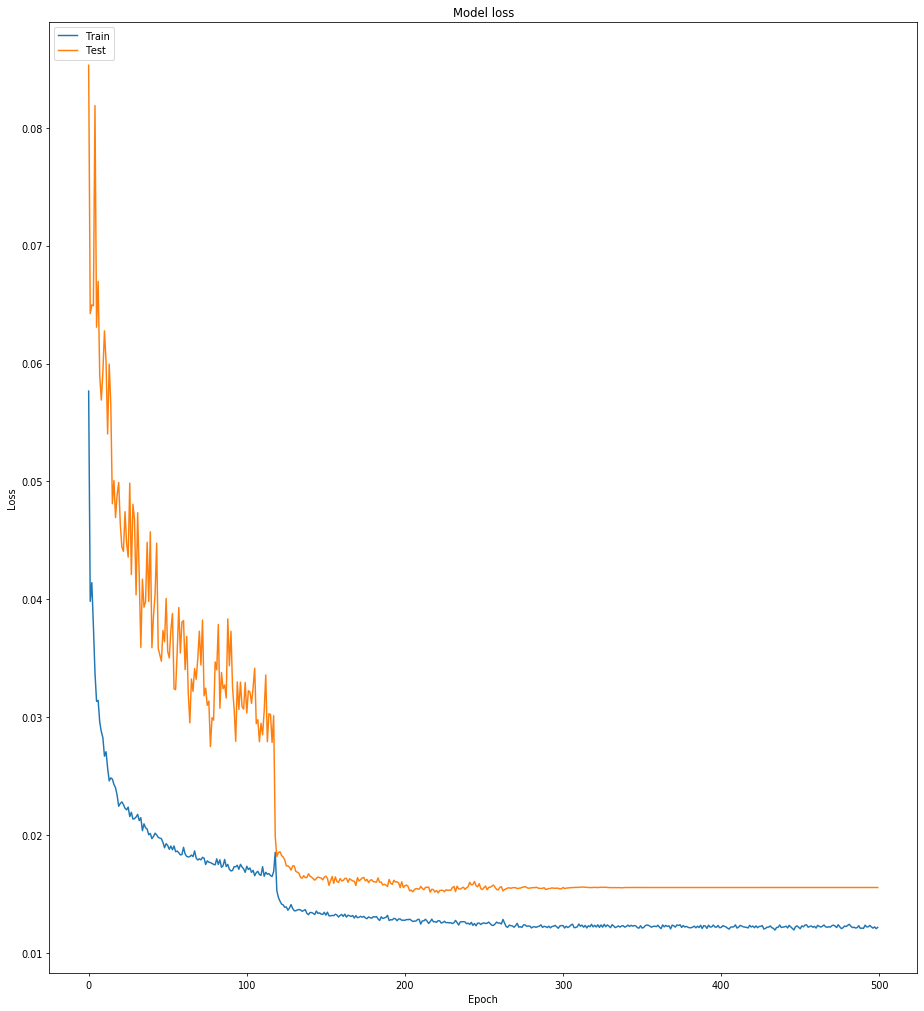

In [30]:
plt.figure(figsize=(16, 18), dpi=70)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

------------------------------
MAPE of Test Data (Short-term prediction - 2 Days) :  5.651
MAPE of Test Data (Long-term prediction - 5 Days) :  3.244
------------------------------
MAE of Test Data (Short-term prediction -2 Days) :  0.006
MAE of Test Data (Long-term prediction - 5 Days) :  0.003
------------------------------


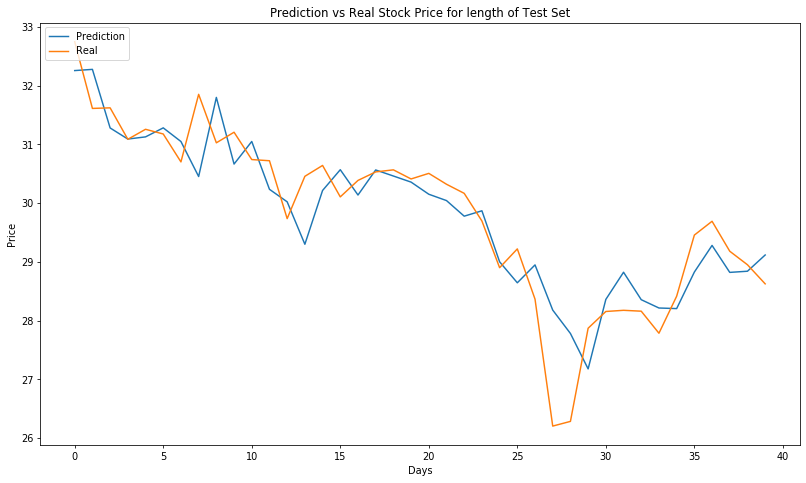

In [31]:
# Visualize predictions

best_model = load_model(os.path.join(filename,'best_model_lstm.h5'))

y_pred = best_model.predict(x_test,batch_size=batch_size)
y_pred = y_pred.flatten()

error = mean_absolute_error(y_test, y_pred)

mape_test_2=mean_absolute_percentage_error(y_test[:2],y_pred[:2])
mape_test_5=mean_absolute_percentage_error(y_test[:5],y_pred[:5])

mae_test_2=mean_absolute_error(y_test[:2],y_pred[:2])
mae_test_5=mean_absolute_error(y_test[:5],y_pred[:5])

print('-'*30)
print('MAPE of Test Data (Short-term prediction - 2 Days) : ', round(mape_test_2,3))
print('MAPE of Test Data (Long-term prediction - 5 Days) : ', round(mape_test_5,3))
print('-'*30)
print('MAE of Test Data (Short-term prediction -2 Days) : ', round(mae_test_2,3))
print('MAE of Test Data (Long-term prediction - 5 Days) : ', round(mae_test_5,3))
print('-'*30)

#print("Mean Squared Error  : ", round(error,6), y_pred.shape, y_test.shape)
#print("Mean Squared Error  : ", round(error,6))
#print(y_pred[0:15])
#print(y_test[0:15])

y_pred_inv = (y_pred * scaler.data_range_[3]) + scaler.data_min_[3]
y_test_inv = (y_test * scaler.data_range_[3]) + scaler.data_min_[3]
#print(y_pred_inv[0:15])
#print(y_test_inv[0:15])

plt.figure(figsize=(14, 8), dpi=70)
plt.plot(y_pred_inv)
plt.plot(y_test_inv)
plt.title('Prediction vs Real Stock Price for length of Test Set')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

In [32]:
results['lstm_loss']=history.history['loss']
results['lstm_val_loss']=history.history['val_loss']
lstm_preds=y_pred_inv

In [33]:
print('Average Training Mean Absolute Error : {:.4f}'.format(results['lstm_loss'].mean()))

Average Training Mean Absolute Error : 0.0144


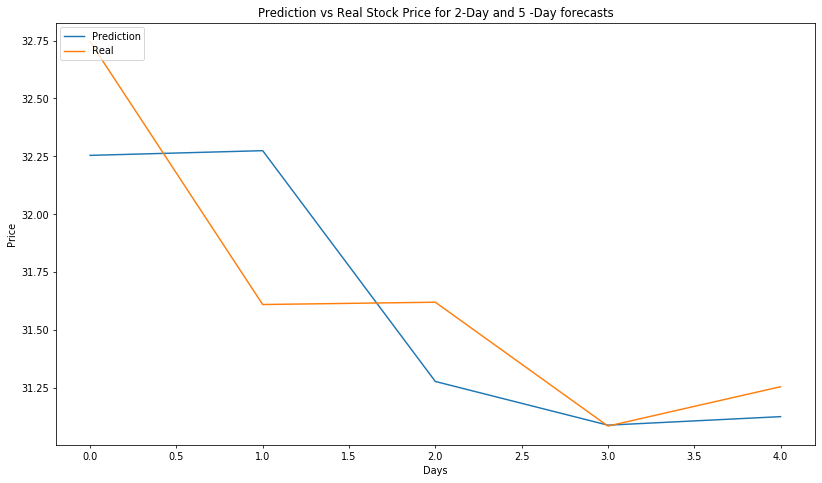

In [34]:
plt.figure(figsize=(14, 8), dpi=70)
plt.plot(y_pred_inv[:5])
plt.plot(y_test_inv[:5])
plt.title('Prediction vs Real Stock Price for 2-Day and 5 -Day forecasts')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

In [35]:
y_pred_inv

array([32.25412 , 32.274483, 31.277714, 31.088985, 31.125776, 31.279305,
       31.046982, 30.451187, 31.797523, 30.663527, 31.047749, 30.233862,
       30.021   , 29.298872, 30.214056, 30.567425, 30.136484, 30.563091,
       30.459982, 30.356129, 30.149982, 30.042034, 29.776665, 29.86827 ,
       28.999962, 28.643244, 28.947618, 28.17875 , 27.780773, 27.178205,
       28.36045 , 28.822832, 28.355545, 28.21423 , 28.204168, 28.825686,
       29.279041, 28.82011 , 28.839993, 29.11621 ], dtype=float32)

In [36]:
y_test_inv

array([32.745, 31.61 , 31.62 , 31.085, 31.255, 31.175, 30.7  , 31.85 ,
       31.025, 31.205, 30.74 , 30.72 , 29.735, 30.455, 30.64 , 30.105,
       30.385, 30.53 , 30.565, 30.41 , 30.505, 30.32 , 30.165, 29.695,
       28.9  , 29.22 , 28.365, 26.205, 26.285, 27.87 , 28.155, 28.175,
       28.16 , 27.785, 28.415, 29.455, 29.69 , 29.18 , 28.95 , 28.625])

## C-LSTM 

In [41]:
#C-LSTM
lr_rate=0.0002
time_steps=10
batch_size=10
num_of_epochs=500
optimisers = optimizers.Adam(lr=lr_rate)

In [42]:
x_train,y_train=data_tensor(batch_size,time_steps,train_scaled,3)
x_test,y_test=data_tensor(batch_size,time_steps,test_scaled,3)
x_val,y_val=data_tensor(batch_size,time_steps,val_scaled,3)

In [43]:
def define_cnn_lstm_model():
    model = Sequential()
    
    model.add(Conv1D(64, 3, activation='relu', input_shape=(time_steps,x_train.shape[2]),
                     kernel_initializer='random_uniform'))
    model.add(MaxPooling1D(pool_size=1))

    
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(0.17))

    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    model.compile(loss='mean_squared_error', optimizer=optimisers)
    
    model.summary()
    
    return model

In [44]:
## Define call Backs 
model=define_cnn_lstm_model()

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=40, min_delta=0)
    

lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=40, 
                        verbose=1, mode='auto', min_delta=0, cooldown=0, min_lr=0)

csv_log = CSVLogger(os.path.join(filename,"log_cnn_lstm.csv"),separator=';',append=False)


MC = ModelCheckpoint(os.path.join(filename,
                          "best_model_cnn.h5"), monitor='val_loss', verbose=1,
                          save_best_only=True, save_weights_only=False, mode='min', period=1)
    
history = model.fit(x_train,y_train, epochs=num_of_epochs, batch_size=batch_size,
                    shuffle=False, validation_data=(x_val,y_val),callbacks=[lr_on_plateau,MC,csv_log])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 64)             3328      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 128)            98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 128)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total para

2570/2570 [==============================] - 3s 984us/step - loss: 0.0017 - val_loss: 9.6006e-04

Epoch 00039: val_loss improved from 0.00100 to 0.00096, saving model to Logs/best_model_cnn.h5
Epoch 40/500
2570/2570 [==============================] - 3s 1ms/step - loss: 0.0017 - val_loss: 8.9665e-04

Epoch 00040: val_loss improved from 0.00096 to 0.00090, saving model to Logs/best_model_cnn.h5
Epoch 41/500
2570/2570 [==============================] - 3s 1ms/step - loss: 0.0016 - val_loss: 7.9395e-04

Epoch 00041: val_loss improved from 0.00090 to 0.00079, saving model to Logs/best_model_cnn.h5
Epoch 42/500
2570/2570 [==============================] - 3s 1ms/step - loss: 0.0016 - val_loss: 8.0637e-04

Epoch 00042: val_loss did not improve from 0.00079
Epoch 43/500
2570/2570 [==============================] - 3s 1ms/step - loss: 0.0015 - val_loss: 7.8464e-04

Epoch 00043: val_loss improved from 0.00079 to 0.00078, saving model to Logs/best_model_cnn.h5
Epoch 44/500
2570/2570 [===========

2570/2570 [==============================] - 3s 1ms/step - loss: 5.7816e-04 - val_loss: 4.2246e-04

Epoch 00129: val_loss did not improve from 0.00035
Epoch 130/500
2570/2570 [==============================] - 2s 945us/step - loss: 6.0213e-04 - val_loss: 4.1782e-04

Epoch 00130: val_loss did not improve from 0.00035
Epoch 131/500
2570/2570 [==============================] - 2s 924us/step - loss: 5.4333e-04 - val_loss: 4.1742e-04

Epoch 00131: val_loss did not improve from 0.00035
Epoch 132/500
2570/2570 [==============================] - 2s 906us/step - loss: 6.2356e-04 - val_loss: 4.1733e-04

Epoch 00132: val_loss did not improve from 0.00035
Epoch 133/500
2570/2570 [==============================] - 2s 924us/step - loss: 7.9743e-04 - val_loss: 4.4364e-04

Epoch 00133: val_loss did not improve from 0.00035
Epoch 134/500
2570/2570 [==============================] - 2s 909us/step - loss: 9.4302e-04 - val_loss: 3.7885e-04

Epoch 00134: val_loss did not improve from 0.00035
Epoch 135/500


2570/2570 [==============================] - 2s 951us/step - loss: 3.2863e-04 - val_loss: 2.8964e-04

Epoch 00173: val_loss improved from 0.00029 to 0.00029, saving model to Logs/best_model_cnn.h5
Epoch 174/500
2570/2570 [==============================] - 3s 987us/step - loss: 3.3280e-04 - val_loss: 2.8834e-04

Epoch 00174: val_loss improved from 0.00029 to 0.00029, saving model to Logs/best_model_cnn.h5
Epoch 175/500
2570/2570 [==============================] - 3s 980us/step - loss: 3.4037e-04 - val_loss: 2.8517e-04

Epoch 00175: val_loss improved from 0.00029 to 0.00029, saving model to Logs/best_model_cnn.h5
Epoch 176/500
2570/2570 [==============================] - 3s 979us/step - loss: 3.2159e-04 - val_loss: 2.8603e-04

Epoch 00176: val_loss did not improve from 0.00029
Epoch 177/500
2570/2570 [==============================] - 3s 1ms/step - loss: 3.2207e-04 - val_loss: 2.8573e-04

Epoch 00177: val_loss did not improve from 0.00029
Epoch 178/500
2570/2570 [========================


Epoch 00263: val_loss did not improve from 0.00025
Epoch 264/500
2570/2570 [==============================] - 3s 1ms/step - loss: 2.8011e-04 - val_loss: 2.4787e-04

Epoch 00264: val_loss did not improve from 0.00025
Epoch 265/500
2570/2570 [==============================] - 3s 987us/step - loss: 2.9159e-04 - val_loss: 2.4802e-04

Epoch 00265: val_loss did not improve from 0.00025
Epoch 266/500
2570/2570 [==============================] - 3s 1ms/step - loss: 2.8574e-04 - val_loss: 2.4920e-04

Epoch 00266: val_loss did not improve from 0.00025
Epoch 267/500
2570/2570 [==============================] - 3s 1ms/step - loss: 2.9119e-04 - val_loss: 2.4880e-04

Epoch 00267: val_loss did not improve from 0.00025
Epoch 268/500
2570/2570 [==============================] - 3s 1ms/step - loss: 2.7867e-04 - val_loss: 2.4881e-04

Epoch 00268: val_loss did not improve from 0.00025
Epoch 269/500
2570/2570 [==============================] - 3s 1ms/step - loss: 2.9037e-04 - val_loss: 2.4670e-04

Epoch 0

2570/2570 [==============================] - 3s 996us/step - loss: 2.7216e-04 - val_loss: 2.6557e-04

Epoch 00361: val_loss did not improve from 0.00025
Epoch 362/500
2570/2570 [==============================] - 2s 938us/step - loss: 2.7200e-04 - val_loss: 2.6563e-04

Epoch 00362: val_loss did not improve from 0.00025
Epoch 363/500
2570/2570 [==============================] - 3s 1ms/step - loss: 2.7754e-04 - val_loss: 2.6578e-04

Epoch 00363: val_loss did not improve from 0.00025
Epoch 364/500
2570/2570 [==============================] - 3s 987us/step - loss: 2.7442e-04 - val_loss: 2.6588e-04

Epoch 00364: val_loss did not improve from 0.00025
Epoch 365/500
2570/2570 [==============================] - 3s 1ms/step - loss: 2.7675e-04 - val_loss: 2.6591e-04

Epoch 00365: val_loss did not improve from 0.00025
Epoch 366/500
2570/2570 [==============================] - 2s 971us/step - loss: 2.7675e-04 - val_loss: 2.6597e-04

Epoch 00366: val_loss did not improve from 0.00025
Epoch 367/500
25

2570/2570 [==============================] - 3s 990us/step - loss: 2.7946e-04 - val_loss: 2.6676e-04

Epoch 00410: val_loss did not improve from 0.00025
Epoch 411/500
2570/2570 [==============================] - 2s 947us/step - loss: 2.6456e-04 - val_loss: 2.6675e-04

Epoch 00411: val_loss did not improve from 0.00025
Epoch 412/500
2570/2570 [==============================] - 2s 963us/step - loss: 2.7506e-04 - val_loss: 2.6676e-04

Epoch 00412: val_loss did not improve from 0.00025
Epoch 413/500
2570/2570 [==============================] - 3s 1ms/step - loss: 2.7380e-04 - val_loss: 2.6676e-04

Epoch 00413: val_loss did not improve from 0.00025
Epoch 414/500
2570/2570 [==============================] - 2s 958us/step - loss: 2.7858e-04 - val_loss: 2.6677e-04

Epoch 00414: val_loss did not improve from 0.00025
Epoch 415/500
2570/2570 [==============================] - 2s 942us/step - loss: 2.7181e-04 - val_loss: 2.6678e-04

Epoch 00415: val_loss did not improve from 0.00025
Epoch 416/500


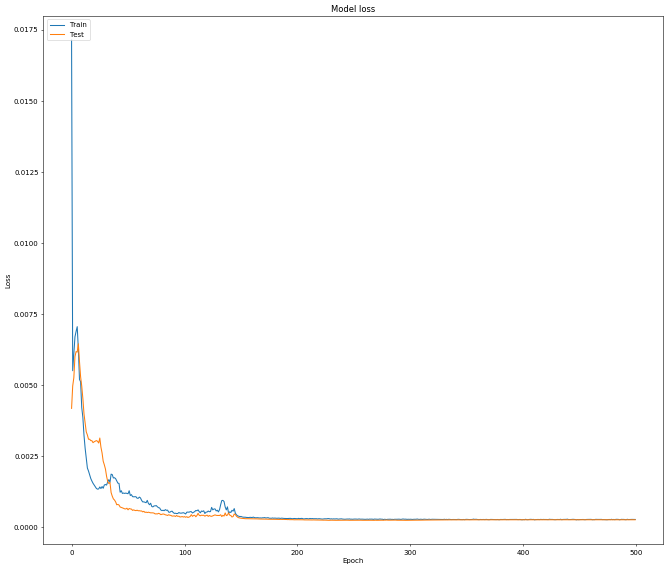

In [45]:
plt.figure(figsize=(16, 14), dpi=50)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

------------------------------
MAPE of Test Data (Short-term prediction - 2 Days) :  8.512
MAPE of Test Data (Long-term prediction - 5 Days) :  6.746
------------------------------
MAE of Test Data (Short-term prediction -2 Days) :  0.009
MAE of Test Data (Long-term prediction - 5 Days) :  0.007
------------------------------


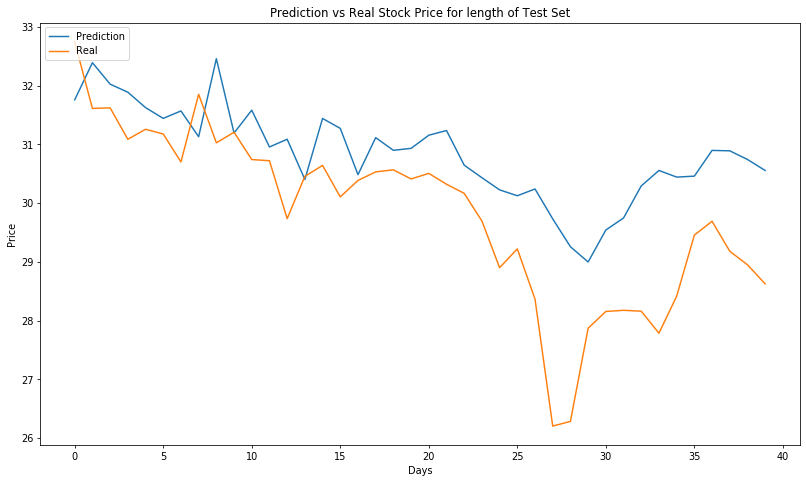

In [46]:
# Visualize predictions


best_model = load_model(os.path.join(filename,'best_model_cnn.h5'))


y_pred = best_model.predict(x_test,batch_size=batch_size)
y_pred = y_pred.flatten()
error = mean_squared_error(y_test, y_pred)

mape_test_2=mean_absolute_percentage_error(y_test[:2],y_pred[:2])
mape_test_5=mean_absolute_percentage_error(y_test[:5],y_pred[:5])

mae_test_2=mean_absolute_error(y_test[:2],y_pred[:2])
mae_test_5=mean_absolute_error(y_test[:5],y_pred[:5])

print('-'*30)
print('MAPE of Test Data (Short-term prediction - 2 Days) : ', round(mape_test_2,3))
print('MAPE of Test Data (Long-term prediction - 5 Days) : ', round(mape_test_5,3))
print('-'*30)
print('MAE of Test Data (Short-term prediction -2 Days) : ', round(mae_test_2,3))
print('MAE of Test Data (Long-term prediction - 5 Days) : ', round(mae_test_5,3))
print('-'*30)


#print("Error is : ", round(error,5), y_pred.shape, y_test.shape)
#print("Error is : ", round(error,5))
#print(y_pred[0:15])
#print(y_test[0:15])

y_pred_inv = (y_pred * scaler.data_range_[3]) + scaler.data_min_[3]
y_test_inv = (y_test * scaler.data_range_[3]) + scaler.data_min_[3]
#print(y_pred_inv[0:15])
#print(y_test_inv[0:15])


plt.figure(figsize=(14, 8), dpi=70)
plt.plot(y_pred_inv)
plt.plot(y_test_inv)
plt.title('Prediction vs Real Stock Price for length of Test Set')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

In [47]:
results['cnn_lstm_loss']=history.history['loss']
results['cnn_lstm_val_loss']=history.history['val_loss']
cnn_lstm_preds=y_pred_inv
print('Average Training Mean Absolute Error : {:.4f}'.format(results['cnn_lstm_loss'].mean()))

Average Training Mean Absolute Error : 0.0006


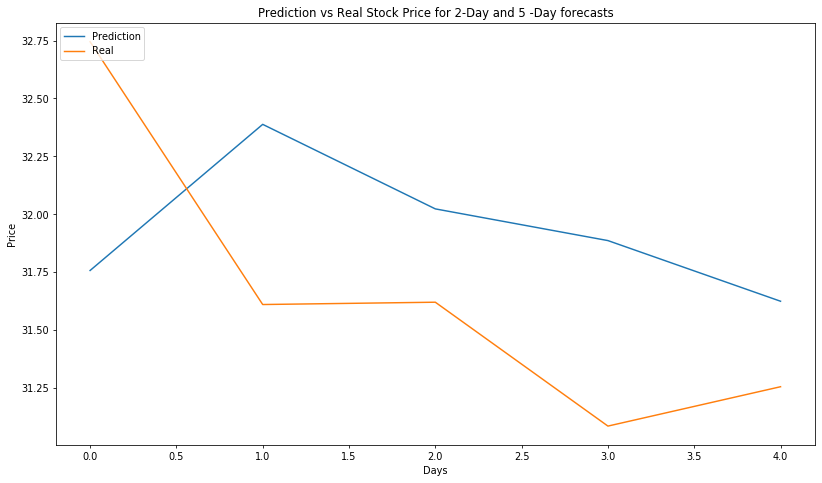

In [48]:
plt.figure(figsize=(14, 8), dpi=70)
plt.plot(y_pred_inv[:5])
plt.plot(y_test_inv[:5])
plt.title('Prediction vs Real Stock Price for 2-Day and 5 -Day forecasts')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

## GRU

In [66]:
# GRU
lr_rate=0.0005
time_steps=10
batch_size=10
num_of_epochs=500
optimisers = optimizers.Adam(lr=lr_rate)

In [67]:
x_train,y_train=data_tensor(batch_size,time_steps,train_scaled,3)
x_test,y_test=data_tensor(batch_size,time_steps,test_scaled,3)
x_val,y_val=data_tensor(batch_size,time_steps,val_scaled,3)

In [68]:
def define_gru_model():
    model = Sequential()
    model.add(GRU(128, 
                batch_input_shape=(batch_size,time_steps,x_train.shape[2]),
                return_sequences=True,
                kernel_initializer='random_uniform',
                kernel_regularizer=regularizers.l2(0.0008)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    model.compile(loss='mean_squared_error', optimizer=optimisers)
    
    model.summary()
    
    return model

In [69]:
## Define call Backs 
model=define_gru_model()

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=40, min_delta=0)
    

lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=40, 
                        verbose=1, mode='auto', min_delta=0, cooldown=0, min_lr=0)


csv_log = CSVLogger(os.path.join(filename,"log_gru.csv"),separator=';',append=False)

MC = ModelCheckpoint(os.path.join(filename,
                          "best_model_gru.h5"), monitor='val_loss', verbose=1,
                          save_best_only=True, save_weights_only=False, mode='min', period=1)
    
history = model.fit(x_train,y_train, epochs=num_of_epochs, batch_size=batch_size,
                    shuffle=False, validation_data=(x_val,y_val),callbacks=[lr_on_plateau,MC,csv_log])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (10, 10, 128)             56064     
_________________________________________________________________
activation_2 (Activation)    (10, 10, 128)             0         
_________________________________________________________________
dropout_3 (Dropout)          (10, 10, 128)             0         
_________________________________________________________________
flatten_3 (Flatten)          (10, 1280)                0         
_________________________________________________________________
dense_5 (Dense)              (10, 256)                 327936    
_________________________________________________________________
dense_6 (Dense)              (10, 1)                   257       
Total params: 384,257
Trainable params: 384,257
Non-trainable params: 0
_________________________________________________________________
Trai

2570/2570 [==============================] - 2s 667us/step - loss: 0.0021 - val_loss: 0.0043

Epoch 00041: val_loss improved from 0.00431 to 0.00425, saving model to Logs/best_model_gru.h5
Epoch 42/500
2570/2570 [==============================] - 2s 679us/step - loss: 0.0022 - val_loss: 0.0040

Epoch 00042: val_loss improved from 0.00425 to 0.00404, saving model to Logs/best_model_gru.h5
Epoch 43/500
2570/2570 [==============================] - 2s 662us/step - loss: 0.0021 - val_loss: 0.0039

Epoch 00043: val_loss improved from 0.00404 to 0.00389, saving model to Logs/best_model_gru.h5
Epoch 44/500
2570/2570 [==============================] - 2s 659us/step - loss: 0.0021 - val_loss: 0.0037

Epoch 00044: val_loss improved from 0.00389 to 0.00374, saving model to Logs/best_model_gru.h5
Epoch 45/500
2570/2570 [==============================] - 2s 672us/step - loss: 0.0020 - val_loss: 0.0040

Epoch 00045: val_loss did not improve from 0.00374
Epoch 46/500
2570/2570 [=======================

2570/2570 [==============================] - 2s 744us/step - loss: 0.0016 - val_loss: 0.0015

Epoch 00089: val_loss improved from 0.00153 to 0.00151, saving model to Logs/best_model_gru.h5
Epoch 90/500
2570/2570 [==============================] - 2s 708us/step - loss: 0.0016 - val_loss: 0.0016

Epoch 00090: val_loss did not improve from 0.00151
Epoch 91/500
2570/2570 [==============================] - 2s 725us/step - loss: 0.0015 - val_loss: 0.0017

Epoch 00091: val_loss did not improve from 0.00151
Epoch 92/500
2570/2570 [==============================] - 2s 686us/step - loss: 0.0015 - val_loss: 0.0018

Epoch 00092: val_loss did not improve from 0.00151
Epoch 93/500
2570/2570 [==============================] - 2s 670us/step - loss: 0.0016 - val_loss: 0.0026

Epoch 00093: val_loss did not improve from 0.00151
Epoch 94/500
2570/2570 [==============================] - 2s 684us/step - loss: 0.0016 - val_loss: 0.0014

Epoch 00094: val_loss improved from 0.00151 to 0.00143, saving model to 

2570/2570 [==============================] - 2s 686us/step - loss: 0.0010 - val_loss: 9.5240e-04

Epoch 00187: val_loss did not improve from 0.00063
Epoch 188/500
2570/2570 [==============================] - 2s 672us/step - loss: 0.0011 - val_loss: 8.9717e-04

Epoch 00188: val_loss did not improve from 0.00063
Epoch 189/500
2570/2570 [==============================] - 2s 679us/step - loss: 0.0010 - val_loss: 9.0349e-04

Epoch 00189: val_loss did not improve from 0.00063
Epoch 190/500
2570/2570 [==============================] - 2s 671us/step - loss: 0.0011 - val_loss: 0.0010

Epoch 00190: val_loss did not improve from 0.00063
Epoch 191/500
2570/2570 [==============================] - 2s 673us/step - loss: 0.0011 - val_loss: 0.0011

Epoch 00191: val_loss did not improve from 0.00063
Epoch 192/500
2570/2570 [==============================] - 2s 664us/step - loss: 0.0011 - val_loss: 8.3839e-04

Epoch 00192: val_loss did not improve from 0.00063
Epoch 193/500
2570/2570 [===================

2570/2570 [==============================] - 2s 929us/step - loss: 7.9765e-04 - val_loss: 4.8781e-04

Epoch 00234: val_loss improved from 0.00049 to 0.00049, saving model to Logs/best_model_gru.h5
Epoch 235/500
2570/2570 [==============================] - 2s 861us/step - loss: 7.9270e-04 - val_loss: 4.8818e-04

Epoch 00235: val_loss did not improve from 0.00049
Epoch 236/500
2570/2570 [==============================] - 2s 790us/step - loss: 7.7552e-04 - val_loss: 4.8186e-04

Epoch 00236: val_loss improved from 0.00049 to 0.00048, saving model to Logs/best_model_gru.h5
Epoch 237/500
2570/2570 [==============================] - 2s 720us/step - loss: 7.4559e-04 - val_loss: 4.7903e-04

Epoch 00237: val_loss improved from 0.00048 to 0.00048, saving model to Logs/best_model_gru.h5
Epoch 238/500
2570/2570 [==============================] - 2s 674us/step - loss: 7.6375e-04 - val_loss: 4.8214e-04

Epoch 00238: val_loss did not improve from 0.00048
Epoch 239/500
2570/2570 [======================

2570/2570 [==============================] - 2s 690us/step - loss: 6.0300e-04 - val_loss: 4.1323e-04

Epoch 00325: val_loss did not improve from 0.00041
Epoch 326/500
2570/2570 [==============================] - 2s 763us/step - loss: 5.8087e-04 - val_loss: 4.1814e-04

Epoch 00326: val_loss did not improve from 0.00041
Epoch 327/500
2570/2570 [==============================] - 2s 794us/step - loss: 5.9440e-04 - val_loss: 4.1225e-04

Epoch 00327: val_loss improved from 0.00041 to 0.00041, saving model to Logs/best_model_gru.h5
Epoch 328/500
2570/2570 [==============================] - 2s 945us/step - loss: 5.8021e-04 - val_loss: 4.1411e-04

Epoch 00328: val_loss did not improve from 0.00041
Epoch 329/500
2570/2570 [==============================] - 2s 821us/step - loss: 5.7882e-04 - val_loss: 4.1406e-04

Epoch 00329: val_loss did not improve from 0.00041
Epoch 330/500
2570/2570 [==============================] - 2s 818us/step - loss: 5.7764e-04 - val_loss: 4.1019e-04

Epoch 00330: val_lo

Epoch 373/500
2570/2570 [==============================] - 2s 680us/step - loss: 5.7423e-04 - val_loss: 4.0509e-04

Epoch 00373: val_loss did not improve from 0.00040
Epoch 374/500
2570/2570 [==============================] - 2s 683us/step - loss: 5.3057e-04 - val_loss: 4.0432e-04

Epoch 00374: val_loss did not improve from 0.00040
Epoch 375/500
2570/2570 [==============================] - 2s 704us/step - loss: 5.5771e-04 - val_loss: 4.0414e-04

Epoch 00375: val_loss did not improve from 0.00040
Epoch 376/500
2570/2570 [==============================] - 2s 688us/step - loss: 5.5719e-04 - val_loss: 4.1060e-04

Epoch 00376: val_loss did not improve from 0.00040
Epoch 377/500
2570/2570 [==============================] - 2s 677us/step - loss: 5.7142e-04 - val_loss: 4.0635e-04

Epoch 00377: val_loss did not improve from 0.00040
Epoch 378/500
2570/2570 [==============================] - 2s 691us/step - loss: 5.5215e-04 - val_loss: 4.0893e-04

Epoch 00378: val_loss did not improve from 0.0004

2570/2570 [==============================] - 2s 747us/step - loss: 5.1342e-04 - val_loss: 3.9628e-04

Epoch 00467: val_loss did not improve from 0.00038
Epoch 468/500
2570/2570 [==============================] - 2s 809us/step - loss: 5.2703e-04 - val_loss: 3.8276e-04

Epoch 00468: val_loss did not improve from 0.00038
Epoch 469/500
2570/2570 [==============================] - 2s 847us/step - loss: 5.0135e-04 - val_loss: 3.9613e-04

Epoch 00469: val_loss did not improve from 0.00038
Epoch 470/500
2570/2570 [==============================] - 2s 801us/step - loss: 5.2955e-04 - val_loss: 3.8676e-04

Epoch 00470: val_loss did not improve from 0.00038
Epoch 471/500
2570/2570 [==============================] - 2s 780us/step - loss: 4.9864e-04 - val_loss: 3.9783e-04

Epoch 00471: val_loss did not improve from 0.00038
Epoch 472/500
2570/2570 [==============================] - 2s 745us/step - loss: 5.2982e-04 - val_loss: 3.8990e-04

Epoch 00472: val_loss did not improve from 0.00038
Epoch 473/50

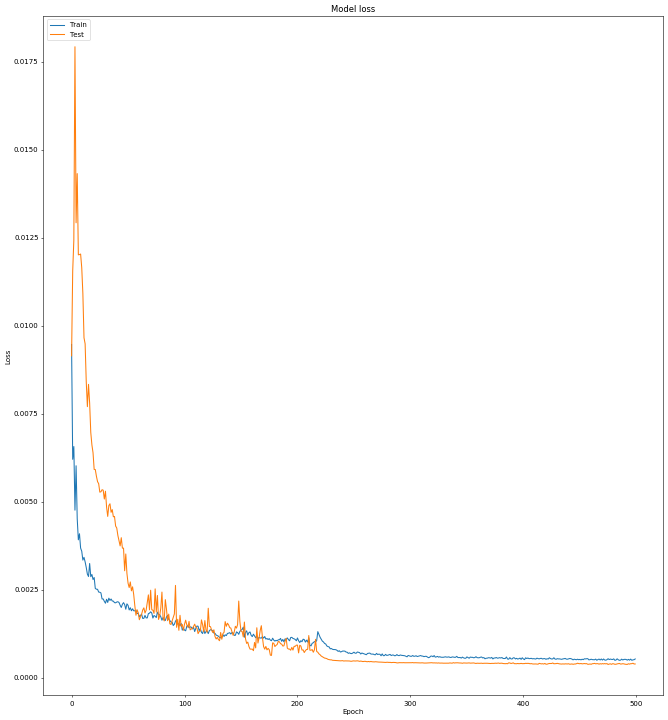

In [70]:
# Visualize the loss
plt.figure(figsize=(16, 18), dpi=50)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

------------------------------
MAPE of Test Data (Short-term prediction - 2 Days) :  12.807
MAPE of Test Data (Long-term prediction - 5 Days) :  14.455
------------------------------
MAE of Test Data (Short-term prediction -2 Days) :  0.013
MAE of Test Data (Long-term prediction - 5 Days) :  0.014
------------------------------


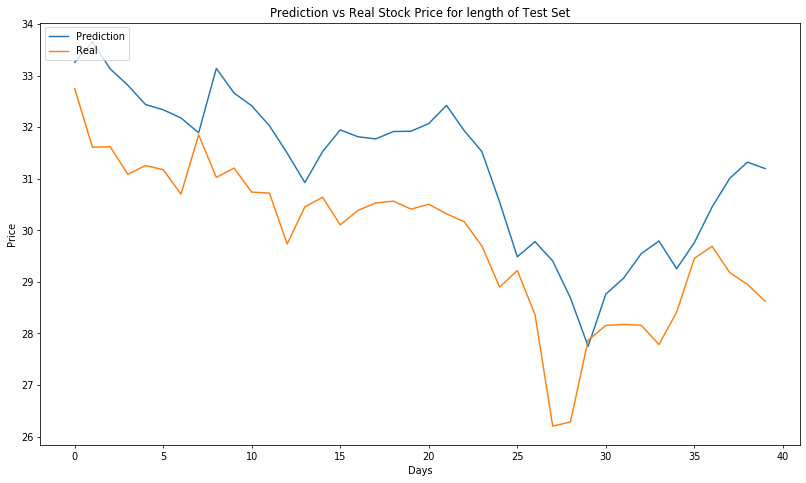

In [71]:
best_model = load_model(os.path.join(filename,'best_model_gru.h5'))


y_pred = best_model.predict(x_test,batch_size=batch_size)
y_pred = y_pred.flatten()
error = mean_squared_error(y_test, y_pred)

mape_test_2=mean_absolute_percentage_error(y_test[:2],y_pred[:2])
mape_test_5=mean_absolute_percentage_error(y_test[:5],y_pred[:5])

mae_test_2=mean_absolute_error(y_test[:2],y_pred[:2])
mae_test_5=mean_absolute_error(y_test[:5],y_pred[:5])

print('-'*30)
print('MAPE of Test Data (Short-term prediction - 2 Days) : ', round(mape_test_2,3))
print('MAPE of Test Data (Long-term prediction - 5 Days) : ', round(mape_test_5,3))
print('-'*30)
print('MAE of Test Data (Short-term prediction -2 Days) : ', round(mae_test_2,3))
print('MAE of Test Data (Long-term prediction - 5 Days) : ', round(mae_test_5,3))
print('-'*30)


#print("Mean Squared Error is : ", round(error,5))
#print(y_pred[0:15])
#print(y_test[0:15])

y_pred_inv = (y_pred * scaler.data_range_[3]) + scaler.data_min_[3]
y_test_inv = (y_test * scaler.data_range_[3]) + scaler.data_min_[3]
#print(y_pred_inv[0:15])
#print(y_test_inv[0:15])


plt.figure(figsize=(14, 8), dpi=70)
plt.plot(y_pred_inv)
plt.plot(y_test_inv)
plt.title('Prediction vs Real Stock Price for length of Test Set')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

In [72]:
results['gru_loss']=history.history['loss']
results['gru_val_loss']=history.history['val_loss']
gru_preds=y_pred_inv
print('Average Training Mean Absolute Error : {:.4f}'.format(results['gru_loss'].mean()))

Average Training Mean Absolute Error : 0.0011


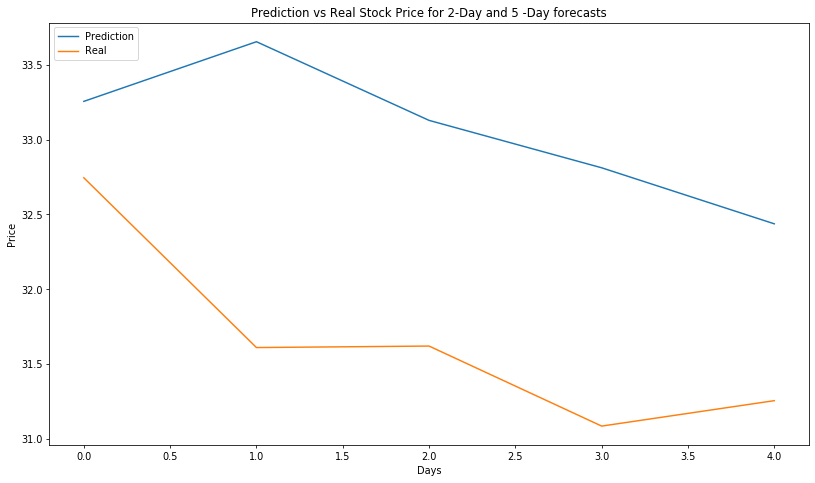

In [73]:
plt.figure(figsize=(14, 8), dpi=70)
plt.plot(y_pred_inv[:5])
plt.plot(y_test_inv[:5])
plt.title('Prediction vs Real Stock Price for 2-Day and 5 -Day forecasts')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

In [74]:
x_test.shape

(40, 10, 17)

In [75]:
x_test[0]

array([[0.15080753, 0.1358209 , 0.1377307 , 0.13484787, 0.11524936,
        0.12720028, 0.67841179, 0.90220556, 0.83520206, 0.67670683,
        0.61962308, 0.88254959, 0.65613296, 0.64909091, 0.13253953,
        0.16050244, 0.6781793 ],
       [0.14036622, 0.13276212, 0.13658767, 0.13278259, 0.11905695,
        0.13125498, 0.66179411, 0.86601878, 0.85481948, 0.65066934,
        0.62243398, 0.72498137, 0.62113764, 0.62424242, 0.13410111,
        0.15608281, 0.64682557],
       [0.11531735, 0.10120693, 0.10864094, 0.1028108 , 0.11984698,
        0.12829537, 0.46252232, 0.74117681, 0.84748728, 0.61666667,
        0.61480769, 0.53369564, 0.45203151, 0.26363636, 0.13683389,
        0.15875785, 0.64531595],
       [0.09206872, 0.09554081, 0.09458893, 0.10165223, 0.1222943 ,
        0.12494945, 0.45609583, 0.60686069, 0.81589387, 0.63534137,
        0.60806568, 0.47494346, 0.39573097, 0.2109624 , 0.10872536,
        0.12305187, 0.58749012],
       [0.08430203, 0.08586696, 0.08997483, 0.097622

## CONV1D Model

In [76]:
#CNN-1D
lr_rate=0.0002
time_steps=10
batch_size=10
num_of_epochs=500
optimisers = optimizers.Adam(lr=lr_rate)

In [77]:
x_train,y_train=data_tensor(batch_size,time_steps,train_scaled,3)
x_test,y_test=data_tensor(batch_size,time_steps,test_scaled,3)
x_val,y_val=data_tensor(batch_size,time_steps,val_scaled,3)

In [78]:
def define_cnn_model():
    model = Sequential()
    
    model.add(Conv1D(32, 3,input_shape=(time_steps,x_train.shape[2]),
                     kernel_initializer='random_uniform'))  
    model.add(Activation('relu'))
    #model.add(Conv1D(16, 3, activation='relu'))
    
    model.add(MaxPooling1D(pool_size=1))
    
    
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(1,activation='linear'))
    
    model.compile(loss='mean_squared_error', optimizer=optimisers)
    
    model.summary()
    
    return model

In [79]:
## Define call Backs 
model=define_cnn_model()


ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=40, min_delta=0)
    

lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=40, 
                        verbose=1, mode='auto', min_delta=0, cooldown=0, min_lr=0)

csv_log = CSVLogger(os.path.join(filename,"log_cnn.csv"),separator=';',append=False)
                    

MC = ModelCheckpoint(os.path.join(filename,
                          "best_model_conv2d.h5"), monitor='val_loss', verbose=1,
                          save_best_only=True, save_weights_only=False, mode='min', period=1)
    
history = model.fit(x_train,y_train, epochs=num_of_epochs, batch_size=batch_size,
                    shuffle=False, validation_data=(x_val,y_val),callbacks=[lr_on_plateau,MC,csv_log])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 8, 32)             1664      
_________________________________________________________________
activation_3 (Activation)    (None, 8, 32)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________
Train 

Epoch 81/500
2570/2570 [==============================] - 0s 138us/step - loss: 4.9658e-04 - val_loss: 7.3204e-04

Epoch 00081: val_loss did not improve from 0.00065
Epoch 82/500
2570/2570 [==============================] - 0s 135us/step - loss: 5.0836e-04 - val_loss: 7.6302e-04

Epoch 00082: val_loss did not improve from 0.00065
Epoch 83/500
2570/2570 [==============================] - 0s 140us/step - loss: 5.2239e-04 - val_loss: 7.4401e-04

Epoch 00083: val_loss did not improve from 0.00065
Epoch 84/500
2570/2570 [==============================] - 0s 142us/step - loss: 5.2727e-04 - val_loss: 7.8964e-04

Epoch 00084: val_loss did not improve from 0.00065
Epoch 85/500
2570/2570 [==============================] - 0s 131us/step - loss: 5.0764e-04 - val_loss: 7.9431e-04

Epoch 00085: val_loss did not improve from 0.00065
Epoch 86/500
2570/2570 [==============================] - 0s 145us/step - loss: 4.9321e-04 - val_loss: 7.4238e-04

Epoch 00086: val_loss did not improve from 0.00065
Epoc

2570/2570 [==============================] - 0s 132us/step - loss: 3.6095e-04 - val_loss: 3.7177e-04

Epoch 00171: val_loss did not improve from 0.00029
Epoch 172/500
2570/2570 [==============================] - 0s 144us/step - loss: 3.6171e-04 - val_loss: 3.9031e-04

Epoch 00172: val_loss did not improve from 0.00029
Epoch 173/500
2570/2570 [==============================] - 0s 133us/step - loss: 3.6312e-04 - val_loss: 4.0480e-04

Epoch 00173: val_loss did not improve from 0.00029
Epoch 174/500
2570/2570 [==============================] - 0s 155us/step - loss: 3.6439e-04 - val_loss: 4.2323e-04

Epoch 00174: val_loss did not improve from 0.00029
Epoch 175/500
2570/2570 [==============================] - 0s 145us/step - loss: 3.6778e-04 - val_loss: 4.3672e-04

Epoch 00175: val_loss did not improve from 0.00029
Epoch 176/500
2570/2570 [==============================] - 0s 133us/step - loss: 3.6971e-04 - val_loss: 4.4728e-04

Epoch 00176: val_loss did not improve from 0.00029
Epoch 177/50

2570/2570 [==============================] - 0s 142us/step - loss: 5.3680e-04 - val_loss: 8.9446e-04

Epoch 00220: val_loss did not improve from 0.00028
Epoch 221/500
2570/2570 [==============================] - 0s 140us/step - loss: 6.1844e-04 - val_loss: 0.0010

Epoch 00221: val_loss did not improve from 0.00028
Epoch 222/500
2570/2570 [==============================] - 0s 132us/step - loss: 7.0271e-04 - val_loss: 0.0012

Epoch 00222: val_loss did not improve from 0.00028
Epoch 223/500
2570/2570 [==============================] - 0s 130us/step - loss: 7.9355e-04 - val_loss: 0.0013

Epoch 00223: val_loss did not improve from 0.00028
Epoch 224/500
2570/2570 [==============================] - 0s 182us/step - loss: 8.0562e-04 - val_loss: 0.0012

Epoch 00224: val_loss did not improve from 0.00028
Epoch 225/500
2570/2570 [==============================] - 0s 166us/step - loss: 7.7418e-04 - val_loss: 0.0011

Epoch 00225: val_loss did not improve from 0.00028
Epoch 226/500
2570/2570 [=======

2570/2570 [==============================] - 0s 154us/step - loss: 3.2942e-04 - val_loss: 2.2451e-04

Epoch 00304: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 305/500
2570/2570 [==============================] - 0s 170us/step - loss: 3.2827e-04 - val_loss: 2.2444e-04

Epoch 00305: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 306/500
2570/2570 [==============================] - 0s 161us/step - loss: 3.2788e-04 - val_loss: 2.2437e-04

Epoch 00306: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 307/500
2570/2570 [==============================] - 0s 153us/step - loss: 3.2769e-04 - val_loss: 2.2431e-04

Epoch 00307: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 308/500
2570/2570 [==============================] - 0s 149us/step - loss: 3.2795e-04 - val_loss: 2.2420e-04

Epoch 00308: val_loss improved from 0.0002

2570/2570 [==============================] - 0s 136us/step - loss: 3.1496e-04 - val_loss: 2.1980e-04

Epoch 00380: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 381/500
2570/2570 [==============================] - 0s 131us/step - loss: 3.1478e-04 - val_loss: 2.1976e-04

Epoch 00381: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 382/500
2570/2570 [==============================] - 0s 142us/step - loss: 3.1463e-04 - val_loss: 2.1970e-04

Epoch 00382: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 383/500
2570/2570 [==============================] - 0s 161us/step - loss: 3.1447e-04 - val_loss: 2.1967e-04

Epoch 00383: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 384/500
2570/2570 [==============================] - 0s 147us/step - loss: 3.1434e-04 - val_loss: 2.1962e-04

Epoch 00384: val_loss improved from 0.0002

2570/2570 [==============================] - 0s 156us/step - loss: 3.0590e-04 - val_loss: 2.1780e-04

Epoch 00456: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 457/500
2570/2570 [==============================] - 0s 156us/step - loss: 3.0578e-04 - val_loss: 2.1778e-04

Epoch 00457: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 458/500
2570/2570 [==============================] - 0s 149us/step - loss: 3.0576e-04 - val_loss: 2.1777e-04

Epoch 00458: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 459/500
2570/2570 [==============================] - 0s 149us/step - loss: 3.0568e-04 - val_loss: 2.1774e-04

Epoch 00459: val_loss improved from 0.00022 to 0.00022, saving model to Logs/best_model_conv2d.h5
Epoch 460/500
2570/2570 [==============================] - 0s 166us/step - loss: 3.0573e-04 - val_loss: 2.1770e-04

Epoch 00460: val_loss improved from 0.0002

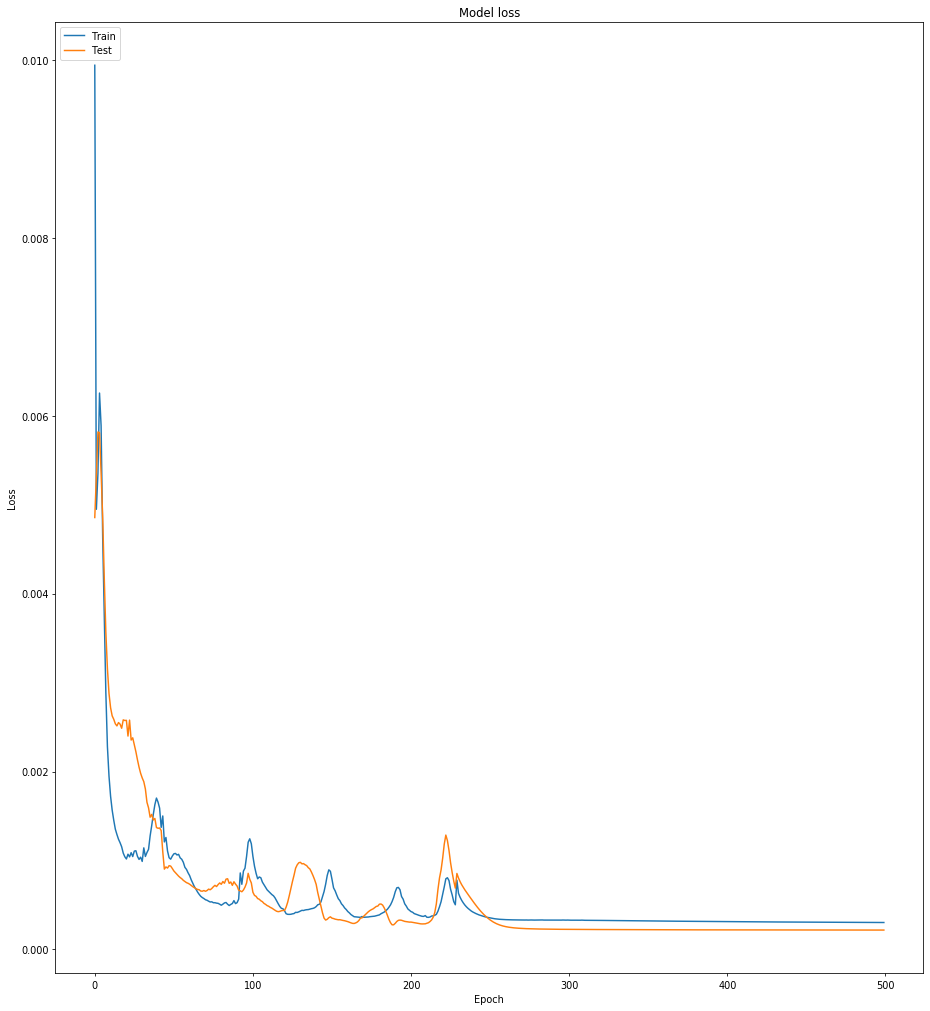

In [80]:
# Visualize the loss
plt.figure(figsize=(16, 18), dpi=70)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

------------------------------
MAPE of Test Data (Short-term prediction - 2 Days) :  10.746
MAPE of Test Data (Long-term prediction - 5 Days) :  6.929
------------------------------
MAE of Test Data (Short-term prediction -2 Days) :  0.011
MAE of Test Data (Long-term prediction - 5 Days) :  0.007
------------------------------


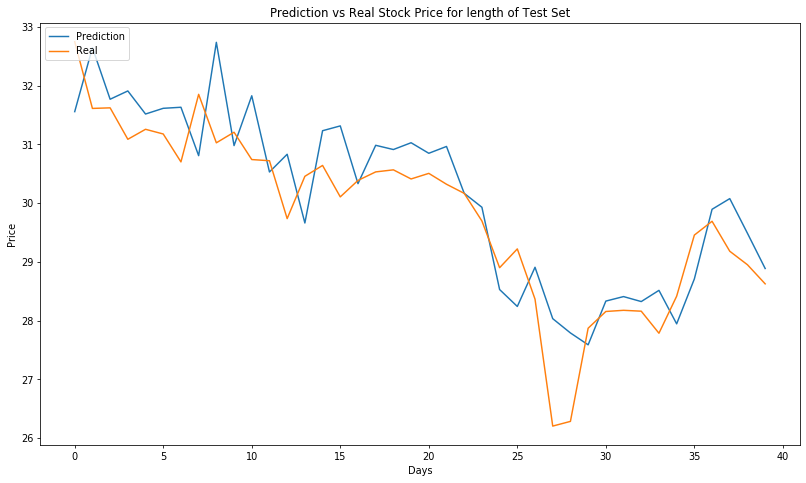

In [81]:
best_model = load_model(os.path.join(filename,'best_model_conv2d.h5'))


y_pred = best_model.predict(x_test,batch_size=batch_size)
y_pred = y_pred.flatten()
error = mean_squared_error(y_test, y_pred)


mape_test_2=mean_absolute_percentage_error(y_test[:2],y_pred[:2])
mape_test_5=mean_absolute_percentage_error(y_test[:5],y_pred[:5])

mae_test_2=mean_absolute_error(y_test[:2],y_pred[:2])
mae_test_5=mean_absolute_error(y_test[:5],y_pred[:5])

print('-'*30)
print('MAPE of Test Data (Short-term prediction - 2 Days) : ', round(mape_test_2,3))
print('MAPE of Test Data (Long-term prediction - 5 Days) : ', round(mape_test_5,3))
print('-'*30)
print('MAE of Test Data (Short-term prediction -2 Days) : ', round(mae_test_2,3))
print('MAE of Test Data (Long-term prediction - 5 Days) : ', round(mae_test_5,3))
print('-'*30)

#print("Mean Squared Error is : ", round(error,5))
#print(y_pred[0:15])
#print(y_test[0:15])

y_pred_inv = (y_pred * scaler.data_range_[3]) + scaler.data_min_[3]
y_test_inv = (y_test * scaler.data_range_[3]) + scaler.data_min_[3]
#print(y_pred_inv[0:15])
#print(y_test_inv[0:15])


plt.figure(figsize=(14, 8), dpi=70)
plt.plot(y_pred_inv)
plt.plot(y_test_inv)
plt.title('Prediction vs Real Stock Price for length of Test Set')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

In [82]:
results['cnn_loss']=history.history['loss']
results['cnn_val_loss']=history.history['val_loss']
cnn_preds=y_pred_inv
print('Average Training Mean Absolute Error : {:.4f}'.format(results['cnn_loss'].mean()))

Average Training Mean Absolute Error : 0.0006


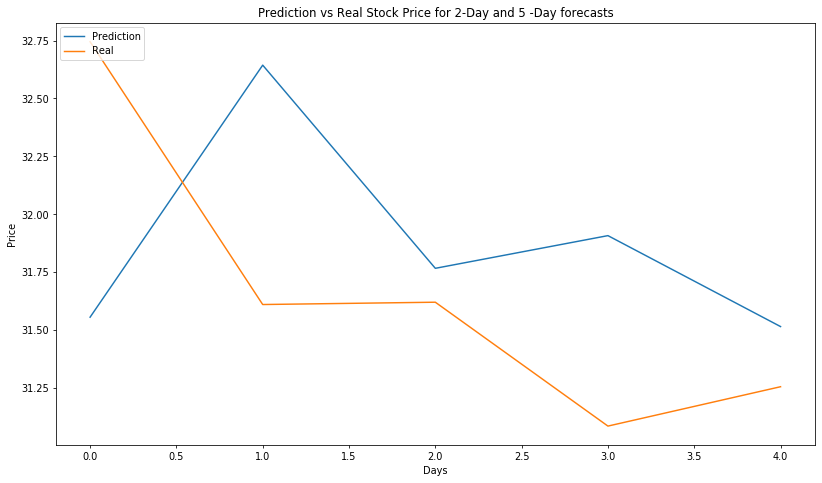

In [83]:
plt.figure(figsize=(14, 8), dpi=70)
plt.plot(y_pred_inv[:5])
plt.plot(y_test_inv[:5])
plt.title('Prediction vs Real Stock Price for 2-Day and 5 -Day forecasts')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

## Plot Forecasts 

In [254]:
data_subset=data.tail(20)

In [255]:
data_subset.drop(columns=['Year','Date','Month','Volume','Weekday',
                   'GBP/USD_High_Price','GBP/USD_Low_Price','GBP/USD Price',
                   'Oil_Price','Oil_High','Oil_Low','Oil_Volume',
                   'FTSE_Price','FTSE_High','FTSE_Low'
                  ],inplace=True)

data_subset

,Lloyds_Open,Lloyds_High,Lloyds_Low,Lloyds_Close,SMA_10,WMA_10,rsi,stoc_k,stoc_d,mom,macd,adosc,cci,willr,GBP/USD_Open_Price,Oil_Open,FTSE_Open
2856,26.500,26.9800,25.433,26.285,29.0070,28.274000,19.304580,10.243793,27.104237,-4.280,-1.048975,-2.863501e+08,-160.726565,-85.149033,1.3098,43.29,5989.99
2857,25.965,27.9750,25.890,27.870,28.7530,28.067273,38.549554,16.910771,22.549149,-2.540,-1.042388,-1.405944e+08,-79.965476,-57.521353,1.3082,43.53,5897.76
2858,27.740,28.5150,27.675,28.155,28.5180,27.958545,41.344358,24.154952,20.328255,-2.350,-1.002612,-5.953226e+07,-23.631762,-49.187978,1.3075,43.84,6032.85
2859,28.425,28.6100,27.880,28.175,28.3035,27.896182,41.551631,28.906451,19.705669,-2.145,-0.958428,-3.088469e+07,-6.782669,-46.203649,1.3073,44.28,6036.00
2860,28.120,28.2800,27.480,28.160,28.1030,27.870091,41.429630,37.965460,22.253679,-2.005,-0.914085,1.529660e+07,-9.788602,-43.211162,1.3114,45.32,6104.72
2861,28.070,28.1550,27.485,27.785,27.9120,27.812273,38.305482,45.376336,27.259627,-1.910,-0.898841,2.924461e+07,-7.942255,-46.468808,1.3153,45.15,6026.94
2862,28.215,28.5600,27.935,28.415,27.8635,27.903727,45.918181,55.002466,34.719406,-0.485,-0.826398,6.279653e+07,47.054936,-27.392257,1.3042,44.66,6032.18
2863,28.730,29.6300,28.650,29.455,27.8870,28.193091,55.899462,63.894417,42.550013,0.235,-0.677260,1.130113e+08,131.674375,-4.169645,1.3078,45.05,6050.59
2864,29.455,30.0700,29.280,29.690,28.0195,28.520909,57.852449,70.726588,50.311953,1.325,-0.533950,1.256630e+08,147.815932,-8.194954,1.3053,44.62,6154.34
2865,29.285,29.6850,29.020,29.180,28.3170,28.731909,52.270662,75.228288,58.032259,2.975,-0.456269,1.017917e+08,97.961891,-19.193444,1.3035,45.32,6280.12


In [256]:
forecast_scaled=scaler.transform(data_subset)
print(forecast_scaled.shape)

(20, 17)


In [257]:
x,y=data_tensor(batch_size,time_steps,forecast_scaled,3)

In [258]:
#print(forecast_scaled_reshaped.shape)
print(x.shape)

(10, 10, 17)


In [241]:
model1 = load_model(os.path.join(filename,'best_model_conv2d.h5'))
model2 = load_model(os.path.join(filename,'best_model_gru.h5'))
model3 = load_model(os.path.join(filename,'best_model_cnn.h5'))
model4 = load_model(os.path.join(filename,'best_model_lstm.h5'))

In [260]:
lstm_pred = model4.predict(x,batch_size=batch_size)
lstm_pred  = lstm_pred.flatten()

In [261]:
lstm_pred_inv = (lstm_pred * scaler.data_range_[3]) + scaler.data_min_[3]
#test_values_inv= (test_values * scaler.data_range_[3]) + scaler.data_min_[3]

In [262]:
lstm_pred_inv

array([28.839993, 29.11621 , 29.45366 , 28.671003, 28.17448 , 28.00776 ,
       28.062246, 28.53702 , 27.990976, 28.231606], dtype=float32)

In [232]:
test_values_inv

array([28.95 , 28.625, 28.185, 28.66 , 28.135, 28.1  , 28.6  , 28.2  ,
       28.475, 28.2  ])

## Model Comparision

In [ ]:
%%writefile -a lloyds_dl_model_training.py
results[:100][['lstm_loss','cnn_lstm_loss','gru_loss','cnn_loss']].plot(figsize=(14,10))
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

In [ ]:
results[:100][['lstm_val_loss','cnn_lstm_val_loss','gru_val_loss','cnn_loss']].plot(figsize=(14,10))

In [ ]:
%%writefile -a lloyds_dl_model_training.py
preds=pd.DataFrame()
preds['real']=y_test_inv
preds['lstm']=lstm_preds
preds['gru']=gru_preds
preds['cnn_lstm']=cnn_lstm_preds
preds['cnn']=cnn_preds

In [ ]:
%%writefile -a lloyds_dl_model_training.py
plt.figure(figsize=(18,14))
plt.subplot(221)
plt.plot(preds['real'])
plt.plot(preds['lstm'])
plt.legend(['Real','lstm'])
plt.title('Real vs Prediction Price using LSTM Network')

plt.subplot(222)
plt.plot(preds['real'])
plt.plot(preds['gru'])
plt.legend(['real','gru'])
plt.title('Real vs Prediction Price using GRU Network')
          
plt.subplot(223)
plt.plot(preds['real'])
plt.plot(preds['cnn_lstm'])
plt.legend(['real','cnn_lstm'])
plt.title('Real vs Prediction Price using CNN-LSTM Network')
                    
plt.subplot(224)
plt.plot(preds['real'])
plt.plot(preds['cnn'])
plt.legend(['real','cnn'])
plt.title('Real vs Prediction Price using CNN-1D Network')
plt.show()

In [ ]:
%%writefile -a lloyds_dl_model_training.py
plt.figure(figsize=(18,14))
plt.subplot(221)
plt.plot(preds['real'][:5])
plt.plot(preds['lstm'][:5])
plt.legend(['Real','lstm'])
plt.title('Real vs Prediction Price using LSTM Network')

plt.subplot(222)
plt.plot(preds['real'][:5])
plt.plot(preds['gru'][:5])
plt.legend(['real','gru'])
plt.title('Real vs Prediction Price using GRU Network')
          
plt.subplot(223)
plt.plot(preds['real'][:5])
plt.plot(preds['cnn_lstm'][:5])
plt.legend(['real','cnn_lstm'])
plt.title('Real vs Prediction Price using CNN-LSTM Network')
                    
plt.subplot(224)
plt.plot(preds['real'][:5])
plt.plot(preds['cnn'][:5])
plt.legend(['real','cnn'])
plt.title('Real vs Prediction Price using CNN-1D Network')
plt.show()

# Error Plots

In [ ]:
mae_train_error=[0.0155,0.0007,0.0011,0.0005]
mae_test_error_2=[0.008,0.007,0.0040,0.0110]
mae_test_error_5=[0.005,0.004,0.0040,0.007]
dl_models=['RNN LSTM Model','CNN + LSTM Model','RNN GRU Model','CNN1D Model']

plt.figure(figsize=(10,12))
plt.subplot(311)
sns.barplot(y=dl_models,x=mae_train_error)
plt.title('Training - Mean Absolute Error')

plt.subplot(312)
sns.barplot(y=dl_models,x=mae_test_error_2)
plt.title('Mean Absolute Error while forecasing short term prices(2 Days)')

plt.subplot(313)
sns.barplot(y=dl_models,x=mae_test_error_5)
plt.title('Mean Absolute Error while forecasing long term prices(5 Days)')

plt.show()

In [52]:
data.head(2)

,Date,Lloyds_Open,Lloyds_High,Lloyds_Low,Lloyds_Close,Volume,SMA_10,WMA_10,rsi,stoc_k,stoc_d,mom,macd,adosc,cci,willr,GBP/USD Price,GBP/USD_Open_Price,GBP/USD_High_Price,GBP/USD_Low_Price,Oil_Price,Oil_Open,Oil_High,Oil_Low,Oil_Volume,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,Weekday,Month,Year
0,2009-03-03,50.8,53.9,44.1,45.5,104107533.0,55.83,55.680000,37.073918,14.764681,12.192351,-45.4,-13.657867,-4.699649e+07,-145.438898,-95.965418,1.4059,1.4054,1.4159,1.3985,41.65,40.10,42.07,39.44,241540.0,3512.1,3625.8,3676.9,3497.3,1,3,2009
1,2009-03-04,45.3,49.4,45.3,47.7,60277100.0,54.96,54.201818,38.680117,14.718483,13.015858,-8.7,-13.881083,-5.072661e+07,-116.507236,-89.625360,1.4164,1.4049,1.4195,1.3985,45.38,41.38,45.76,41.04,319760.0,3645.9,3512.1,3649.5,3512.1,2,3,2009


In [53]:
data_index=data.set_index('Date')

In [57]:
data_index['2020-08-25':'2020-08-29'].reset_index()

,Date,Lloyds_Open,Lloyds_High,Lloyds_Low,Lloyds_Close,Volume,SMA_10,WMA_10,rsi,stoc_k,stoc_d,mom,macd,adosc,cci,willr,GBP/USD Price,GBP/USD_Open_Price,GBP/USD_High_Price,GBP/USD_Low_Price,Oil_Price,Oil_Open,Oil_High,Oil_Low,Oil_Volume,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,Weekday,Month,Year
0,2020-08-25,28.825,29.265,28.165,28.200,167338907.0,28.6325,28.426000,44.435517,2.201715,24.500813,-1.255,-0.369917,4.245339e+07,-40.399837,-98.510242,1.3150,1.3068,1.3171,1.3054,45.86,45.12,46.07,45.08,178310.0,6037.01,6104.73,6173.48,6032.10,1,8,2020
1,2020-08-26,28.180,28.560,28.030,28.475,91481211.0,28.5110,28.397364,48.050768,2.230276,15.223998,-1.215,-0.343022,4.499803e+07,-41.831496,-97.656735,1.3208,1.3153,1.3220,1.3117,45.64,45.97,46.10,45.54,132510.0,6045.60,6037.01,6050.81,5992.22,2,8,2020
2,2020-08-27,28.320,28.595,28.080,28.200,94257788.0,28.4130,28.340818,44.811213,1.872695,8.448560,-0.980,-0.339979,2.593362e+07,-40.100473,-98.510242,1.3198,1.3207,1.3285,1.3162,45.09,45.70,45.87,44.56,102260.0,5999.99,6045.60,6062.52,5999.99,3,8,2020


In [88]:
import datetime
datetime.datetime.strptime('2009-01-01','%Y-%m-%d').strftime('%Y-%m-%d')

'2009-01-01'

In [269]:
datetime.datetime.now().strftime('%Y-%m-%d')

'2020-08-29'

In [263]:
import pandas_market_calendars as mcal

In [284]:
LSE = mcal.get_calendar('LSE')
a=LSE.valid_days(start_date='2020-08-21', end_date='2020-12-31')[:10]

In [285]:
pred_dates=[]
for i in range(0,10):
    pred_dates.append(a[i].date().strftime('%Y-%m-%d'))
print(pred_dates)

['2020-08-21', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04']


In [287]:
pred=np.load('predictions_dump.npy')

In [288]:
pred

array([28.04282788, 28.10883157, 28.11789357, 28.10232013, 28.09411025])

In [290]:
pred_df=pd.DataFrame({'Date':pred_dates[:len(pred)],
            'Lloyds_Close':pred})

In [291]:
pred_df

,Date,Lloyds_Close
0,2020-08-21,28.042828
1,2020-08-24,28.108832
2,2020-08-25,28.117894
3,2020-08-26,28.102320
4,2020-08-27,28.094110
